In [1]:
from IPython.display import Image

In [4]:
import tensorflow as tf

In [5]:
import keras as k

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [7]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [8]:
# Passo 1 - Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [9]:
# Passo 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [10]:
# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

In [11]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [12]:
# Passo 3 - Flattening
classifier.add(Flatten())

In [13]:
# Passo 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [14]:
# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
# Criando os objetos train_datagen e validation_datagen com as regras de pré-processamento das imagens
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Pré-processamento das imagens de treino e validação
training_set = train_datagen.flow_from_directory('C:\\Users\\USER\\Desktop\\ITA\\Terceiro_semestre\\MTP-03\\Dataset\\Training and Validation',
                                                 target_size = (64, 64),
                                                 batch_size = 64,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('C:\\Users\\USER\\Desktop\\ITA\\Terceiro_semestre\\MTP-03\\Dataset\\Training and Validation',
                                                        target_size = (64, 64),
                                                        batch_size = 64,
                                                        class_mode = 'binary')

Found 1520 images belonging to 2 classes.
Found 1520 images belonging to 2 classes.


In [17]:
# Executando o treinamento
classifier.fit(training_set, steps_per_epoch = 18, epochs = 10, validation_data = validation_set,validation_steps = 53)

ImportError: Image transformations require SciPy. Install SciPy.

## COMEÇANDO OS TESTES

In [17]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('C:\\Users\\USER\\Desktop\\ITA\\Terceiro_semestre\\MTP-03\\Dataset\\Testing\\fire\\abc001.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices


{'fire': 0, 'nofire': 1}

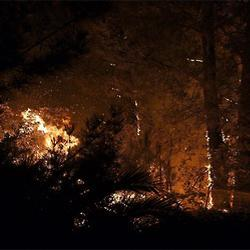

In [18]:

if result[0][0] == 0:
    prediction = 'Incendio'
else:
    prediction = 'Nao-incendio'


Image(filename='C:\\Users\\USER\\Desktop\\ITA\\Terceiro_semestre\\MTP-03\\Dataset\\Testing\\fire\\abc001.jpg')

In [19]:
prediction

'Incendio'